In [2]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

### 2021 file load

In [3]:
# 2021 Files to Load
population_data_to_load_2021 = ("Resources/2021Census_G03_VIC_SAL.csv")
suburb_name_data_to_load_2021 = ("Resources/2021Census_geog_desc_1st_2nd_3rd_release.xlsx")
# Reference: https://www.abs.gov.au/census/find-census-data/datapacks?release=2021&product=GCP&geography=ALL&header=S

In [4]:
# Read Population data into Pandas DataFrames
population_data_2021_df = pd.read_csv(population_data_to_load_2021)

# Read population and Suburb data into Pandas DataFrames and specifiy which worksheet number to be read in suburb file
sheet_name = 0
suburb_name_data_2021_df = pd.read_excel(suburb_name_data_to_load_2021, sheet_name = 5)
# Reference:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [5]:
# Rename column in Population data for allow DataFrames to merge
population_data_2021_df= population_data_2021_df.rename(columns={"SAL_CODE_2021":"Census_Code_2021"})
#population_data_2021_df.head()

In [6]:
# Merge Population Data and Suburb Data DataFrames
population_and_suburb_merged_2021_df = pd.merge(population_data_2021_df, suburb_name_data_2021_df, how = "left", on=["Census_Code_2021", "Census_Code_2021"])

In [7]:
# Set Index to AGSS_Code_2021 and rename columns to meaningful headings
population_and_suburb_data_2021_df = population_and_suburb_merged_2021_df.set_index(["AGSS_Code_2021"])
population_and_suburb_data_2021_df = population_and_suburb_data_2021_df.rename(columns={"Total_Total":"Total_Population","Census_Name_2021":"Suburb_Name"})

In [8]:
# Create final Dataframe with only the required columns
population_and_suburb_2021_df = population_and_suburb_data_2021_df[["Suburb_Name","Total_Population","Area sqkm"]]
population_and_suburb_2021_final_df = pd.DataFrame(population_and_suburb_2021_df)
#population_and_suburb_2021_final_df.head()

In [9]:
# Create list of required suburbs
City_of_Melbourne_Suburbs_2021 = population_and_suburb_2021_final_df[(population_and_suburb_2021_final_df["Suburb_Name"]=="East Melbourne")|
(population_and_suburb_2021_final_df["Suburb_Name"]=="Parkville (Vic.)")|
(population_and_suburb_2021_final_df["Suburb_Name"]=="North Melbourne")|
(population_and_suburb_2021_final_df["Suburb_Name"]=="South Yarra")|
(population_and_suburb_2021_final_df["Suburb_Name"]=="Southbank")|
(population_and_suburb_2021_final_df["Suburb_Name"]=="Docklands")|
(population_and_suburb_2021_final_df["Suburb_Name"]=="Carlton (Vic.)")|
(population_and_suburb_2021_final_df["Suburb_Name"]=="West Melbourne")|
(population_and_suburb_2021_final_df["Suburb_Name"]=="Kensington (Vic.)")|
(population_and_suburb_2021_final_df["Suburb_Name"]=="Melbourne")]

# Reference:https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
# Reference: https://www.melbourne.vic.gov.au/about-melbourne/melbourne-profile/suburbs/Pages/suburbs.aspx

City_of_Melbourne_Suburbs_2021

,Suburb_Name,Total_Population,Area sqkm
AGSS_Code_2021,,,
20495,Carlton (Vic.),15896,1.7728
20766,Docklands,15547,3.1480
20830,East Melbourne,5358,1.8557
21327,Kensington (Vic.),10545,2.1373
21640,Melbourne,58262,6.5866
21966,North Melbourne,15040,2.3554
22038,Parkville (Vic.),7756,3.9981
22314,South Yarra,24609,3.5475
22315,Southbank,22717,1.5640


In [10]:
# Create DataFrame for City of Melbourne suburbs
City_of_Melbourne_Suburbs_2021_df = pd.DataFrame(City_of_Melbourne_Suburbs_2021)
#City_of_Melbourne_Suburbs_2021_df

In [11]:
# Add Census Year to the DataFrame:
year = ["2021","2021","2021","2021","2021","2021","2021","2021","2021","2021"]
City_of_Melbourne_Suburbs_2021_df["Census_Year"] = year
City_of_Melbourne_Suburbs_2021_df

,Suburb_Name,Total_Population,Area sqkm,Census_Year
AGSS_Code_2021,,,,
20495,Carlton (Vic.),15896,1.7728,2021
20766,Docklands,15547,3.1480,2021
20830,East Melbourne,5358,1.8557,2021
21327,Kensington (Vic.),10545,2.1373,2021
21640,Melbourne,58262,6.5866,2021
21966,North Melbourne,15040,2.3554,2021
22038,Parkville (Vic.),7756,3.9981,2021
22314,South Yarra,24609,3.5475,2021
22315,Southbank,22717,1.5640,2021


### 2016 file load

In [12]:
# 2016 Files to Load
population_data_to_load_2016 = ("Resources/2016Census_G03_VIC_SSC.csv")
suburb_name_data_to_load_2016 = ("Resources/2016Census_geog_desc_1st_and_2nd_release.xlsx")
# Reference: https://www.abs.gov.au/census/find-census-data/datapacks?release=2016&product=GCP&geography=ALL&header=S

In [13]:
# Read Population data into Pandas DataFrames
population_data_2016_df = pd.read_csv(population_data_to_load_2016)

# Read population and Suburb data into Pandas DataFrames and specifiy which worksheet number to be read in suburb file
sheet_name = 0
suburb_name_data_2016_df = pd.read_excel(suburb_name_data_to_load_2016, sheet_name = 5)
# Reference:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [14]:
# Rename column in Population data for allow DataFrames to merge
population_data_2016_df= population_data_2016_df.rename(columns={"SSC_CODE_2016":"Census_Code_2016"})

In [15]:
# Merge Population Data and Suburb Data DataFrames
population_and_suburb_merged_2016_df = pd.merge(population_data_2016_df, suburb_name_data_2016_df, how = "left", on=["Census_Code_2016", "Census_Code_2016"])

In [16]:
# Set Index to ASGS_Code_2016 and rename columns to meaningful headings
population_and_suburb_data_2016_df = population_and_suburb_merged_2016_df.set_index(["ASGS_Code_2016"])
population_and_suburb_data_2016_df = population_and_suburb_data_2016_df.rename(columns={"Total_Total":"Total_Population","Census_Name_2016":"Suburb_Name"})

In [17]:
# Create final DataFrame with only the required columns
population_and_suburb_2016_df = population_and_suburb_data_2016_df[["Suburb_Name","Total_Population","Area sqkm"]]
population_and_suburb_2016_final_df = pd.DataFrame(population_and_suburb_2016_df)

In [18]:
# Create list of required suburbs
City_of_Melbourne_Suburbs_2016 = population_and_suburb_2016_final_df[(population_and_suburb_2016_final_df["Suburb_Name"]=="East Melbourne")|
(population_and_suburb_2016_final_df["Suburb_Name"]=="Parkville (Vic.)")|
(population_and_suburb_2016_final_df["Suburb_Name"]=="North Melbourne")|
(population_and_suburb_2016_final_df["Suburb_Name"]=="South Yarra")|
(population_and_suburb_2016_final_df["Suburb_Name"]=="Southbank")|
(population_and_suburb_2016_final_df["Suburb_Name"]=="Docklands")|
(population_and_suburb_2016_final_df["Suburb_Name"]=="Carlton (Vic.)")|
(population_and_suburb_2016_final_df["Suburb_Name"]=="West Melbourne")|
(population_and_suburb_2016_final_df["Suburb_Name"]=="Kensington (Vic.)")|
(population_and_suburb_2016_final_df["Suburb_Name"]=="Melbourne")]

# Reference:https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
# Reference: https://www.melbourne.vic.gov.au/about-melbourne/melbourne-profile/suburbs/Pages/suburbs.aspx

City_of_Melbourne_Suburbs_2016

,Suburb_Name,Total_Population,Area sqkm
ASGS_Code_2016,,,
20492,Carlton (Vic.),18829,1.7488
20760,Docklands,12486,3.1479
20824,East Melbourne,6196,1.8557
21319,Kensington (Vic.),10621,2.1306
21629,Melbourne,60057,6.5045
21954,North Melbourne,15395,2.3619
22026,Parkville (Vic.),9188,4.0492
22303,South Yarra,25237,3.5476
22304,Southbank,22397,1.5639


In [19]:
# Create DataFrame for City of Melbourne suburbs
City_of_Melbourne_Suburbs_2016_df = pd.DataFrame(City_of_Melbourne_Suburbs_2016)
City_of_Melbourne_Suburbs_2016_df

,Suburb_Name,Total_Population,Area sqkm
ASGS_Code_2016,,,
20492,Carlton (Vic.),18829,1.7488
20760,Docklands,12486,3.1479
20824,East Melbourne,6196,1.8557
21319,Kensington (Vic.),10621,2.1306
21629,Melbourne,60057,6.5045
21954,North Melbourne,15395,2.3619
22026,Parkville (Vic.),9188,4.0492
22303,South Yarra,25237,3.5476
22304,Southbank,22397,1.5639


In [20]:
# Add Census Year to the DataFrame:
year = ["2016","2016","2016","2016","2016","2016","2016","2016","2016","2016"]
City_of_Melbourne_Suburbs_2016_df["Census_Year"] = year
City_of_Melbourne_Suburbs_2016_df

,Suburb_Name,Total_Population,Area sqkm,Census_Year
ASGS_Code_2016,,,,
20492,Carlton (Vic.),18829,1.7488,2016
20760,Docklands,12486,3.1479,2016
20824,East Melbourne,6196,1.8557,2016
21319,Kensington (Vic.),10621,2.1306,2016
21629,Melbourne,60057,6.5045,2016
21954,North Melbourne,15395,2.3619,2016
22026,Parkville (Vic.),9188,4.0492,2016
22303,South Yarra,25237,3.5476,2016
22304,Southbank,22397,1.5639,2016


### 2011 file load


In [21]:
# Files to Load
population_data_to_load_2011 = ("Resources/2011Census_B03_VIC_SSC_short.csv")
suburb_name_data_to_load_2011 = ("Resources/2011Census_geog_desc_1st_and_2nd_release.xlsx")
# Reference: https://www.abs.gov.au/census/find-census-data/datapacks?release=2011&product=BCP&geography=ALL&header=S

In [22]:
# Read Population data into Pandas DataFrames
population_data_2011_df = pd.read_csv(population_data_to_load_2011)

# Read population and Suburb data into Pandas DataFrames and specifiy which worksheet number to be read in suburb file
sheet_name = 0
suburb_name_data_2011_df = pd.read_excel(suburb_name_data_to_load_2011)
# Reference:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [23]:
# Rename column in Population data for allow DataFrames to merge
population_data_2011_df= population_data_2011_df.rename(columns={"region_id":"Code"})


In [24]:
# Merge Population Data and Suburb Data DataFrames
population_and_suburb_merged_2011_df = pd.merge(population_data_2011_df, suburb_name_data_2011_df, how = "left", on=["Code", "Code"])


In [25]:
# Set Index to Level and rename columns to meaningful headings
population_and_suburb_data_2011_df = population_and_suburb_merged_2011_df.set_index(["Code"])
population_and_suburb_data_2011_df = population_and_suburb_data_2011_df.rename(columns={"Total_Total":"Total_Population","Label":"Suburb_Name"})

In [26]:
# Create final DataFrame with only the required columns
population_and_suburb_2011_df = population_and_suburb_data_2011_df[["Suburb_Name","Total_Population","Area sqkm"]]
population_and_suburb_2011_final_df = pd.DataFrame(population_and_suburb_2011_df)


In [27]:
# Create list of required suburbs
City_of_Melbourne_Suburbs_2011 = population_and_suburb_2011_final_df[(population_and_suburb_2011_final_df["Suburb_Name"]=="East Melbourne")|
(population_and_suburb_2011_final_df["Suburb_Name"]=="Parkville (Vic.)")|
(population_and_suburb_2011_final_df["Suburb_Name"]=="North Melbourne")|
(population_and_suburb_2011_final_df["Suburb_Name"]=="South Yarra")|
(population_and_suburb_2011_final_df["Suburb_Name"]=="Southbank")|
(population_and_suburb_2011_final_df["Suburb_Name"]=="Docklands")|
(population_and_suburb_2011_final_df["Suburb_Name"]=="Carlton (Vic.)")|
(population_and_suburb_2011_final_df["Suburb_Name"]=="West Melbourne")|
(population_and_suburb_2011_final_df["Suburb_Name"]=="Kensington (Vic.)")|
(population_and_suburb_2011_final_df["Suburb_Name"]=="Melbourne")]

# Reference:https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
# Reference: https://www.melbourne.vic.gov.au/about-melbourne/melbourne-profile/suburbs/Pages/suburbs.aspx

City_of_Melbourne_Suburbs_2011

,Suburb_Name,Total_Population,Area sqkm
Code,,,
SSC20259,Carlton (Vic.),13742,1.69631
SSC20402,Docklands,6756,3.00192
SSC20434,East Melbourne,6073,1.39918
SSC20700,Kensington (Vic.),9616,2.14699
SSC20867,Melbourne,38560,6.23214
SSC21030,North Melbourne,12134,2.38918
SSC21071,Parkville (Vic.),7895,4.04870
SSC21240,South Yarra,19670,3.64949
SSC21241,Southbank,13832,1.26233


In [28]:
# Create DataFrame for City of Melbourne suburbs
City_of_Melbourne_Suburbs_2011_df = pd.DataFrame(City_of_Melbourne_Suburbs_2011)
City_of_Melbourne_Suburbs_2011_df

,Suburb_Name,Total_Population,Area sqkm
Code,,,
SSC20259,Carlton (Vic.),13742,1.69631
SSC20402,Docklands,6756,3.00192
SSC20434,East Melbourne,6073,1.39918
SSC20700,Kensington (Vic.),9616,2.14699
SSC20867,Melbourne,38560,6.23214
SSC21030,North Melbourne,12134,2.38918
SSC21071,Parkville (Vic.),7895,4.04870
SSC21240,South Yarra,19670,3.64949
SSC21241,Southbank,13832,1.26233


In [29]:
# Add Census Year to the DataFrame:
year = ["2011","2011","2011","2011","2011","2011","2011","2011","2011","2011"]
City_of_Melbourne_Suburbs_2011_df["Census_Year"] = year

In [30]:
City_of_Melbourne_Suburbs_2011_df

,Suburb_Name,Total_Population,Area sqkm,Census_Year
Code,,,,
SSC20259,Carlton (Vic.),13742,1.69631,2011
SSC20402,Docklands,6756,3.00192,2011
SSC20434,East Melbourne,6073,1.39918,2011
SSC20700,Kensington (Vic.),9616,2.14699,2011
SSC20867,Melbourne,38560,6.23214,2011
SSC21030,North Melbourne,12134,2.38918,2011
SSC21071,Parkville (Vic.),7895,4.04870,2011
SSC21240,South Yarra,19670,3.64949,2011
SSC21241,Southbank,13832,1.26233,2011


### Population Visualisation

In [49]:
# Merge Population Data and Suburb Data DataFrames for Census Years 2011, 2016 and 2021
merged_population_df = pd.merge(City_of_Melbourne_Suburbs_2011_df, City_of_Melbourne_Suburbs_2016_df, how = "left", on=["Suburb_Name", "Suburb_Name"])

In [50]:
merged_population_df = pd.merge(merged_population_df, City_of_Melbourne_Suburbs_2021_df, how = "left", on=["Suburb_Name", "Suburb_Name"])

In [51]:
# Rename columns for charts
merged_population_renamed_df = merged_population_df.rename(columns=
                                                           {"Total_Population_x":"Total_Population_2011",
                                                            "Total_Population_y":"Total_Population_2016",
                                                            "Total_Population":"Total_Population_2021",
                                                            "Census_Year_x":"Census_Year_2011",
                                                            "Census_Year_y":"Census_Year_2016",
                                                            "Census_Year": "Census_Year_2021",
                                                            "Area sqkm_x": "Area_sqkm_2011",
                                                            "Area sqkm_y": "Area_sqkm_2016",
                                                            "Area sqkm":"Area_sqkm_2021"})
                                                          

In [52]:
merged_population_renamed_df

,Suburb_Name,Total_Population_2011,Area_sqkm_2011,Census_Year_2011,Total_Population_2016,Area_sqkm_2016,Census_Year_2016,Total_Population_2021,Area_sqkm_2021,Census_Year_2021
0,Carlton (Vic.),13742,1.69631,2011,18829,1.7488,2016,15896,1.7728,2021
1,Docklands,6756,3.00192,2011,12486,3.1479,2016,15547,3.1480,2021
2,East Melbourne,6073,1.39918,2011,6196,1.8557,2016,5358,1.8557,2021
3,Kensington (Vic.),9616,2.14699,2011,10621,2.1306,2016,10545,2.1373,2021
4,Melbourne,38560,6.23214,2011,60057,6.5045,2016,58262,6.5866,2021
5,North Melbourne,12134,2.38918,2011,15395,2.3619,2016,15040,2.3554,2021
6,Parkville (Vic.),7895,4.04870,2011,9188,4.0492,2016,7756,3.9981,2021
7,South Yarra,19670,3.64949,2011,25237,3.5476,2016,24609,3.5475,2021
8,Southbank,13832,1.26233,2011,22397,1.5639,2016,22717,1.5640,2021
9,West Melbourne,3851,6.59269,2011,5588,6.5821,2016,7934,6.5822,2021


In [35]:
# Take a copy of the merged dataframe for population only use
population_reduced_df = merged_population_renamed_df.copy()
# Reference: https://www.w3schools.com/python/pandas/ref_df_copy.asp

In [55]:
population_only_df = pd.DataFrame(population_reduced_df[["Suburb_Name",
                                                       "Total_Population_2011",
                                                       "Total_Population_2016",
                                                       "Total_Population_2021"]])

In [56]:
population_only_df

,Suburb_Name,Total_Population_2011,Total_Population_2016,Total_Population_2021
0,Carlton (Vic.),13742,18829,15896
1,Docklands,6756,12486,15547
2,East Melbourne,6073,6196,5358
3,Kensington (Vic.),9616,10621,10545
4,Melbourne,38560,60057,58262
5,North Melbourne,12134,15395,15040
6,Parkville (Vic.),7895,9188,7756
7,South Yarra,19670,25237,24609
8,Southbank,13832,22397,22717
9,West Melbourne,3851,5588,7934


In [59]:
# Set index to "Suburb_Name"
population_only_df = population_only_df.set_index("Suburb_Name")

In [60]:
# Create variables for suburbs included in graph
suburb1 = "Carlton (Vic.)"
suburb2 = "Docklands"
suburb3 = "East Melbourne"
suburb4 = "Kensington (Vic.)"
suburb5 = "Melbourne"
suburb6 = "North Melbourne"
suburb7 = "Parkville (Vic.)"
suburb8 = "South Yarra"
suburb9 = "Southbank"
suburb10 = "West Melbourne"

In [61]:
# Set variable to look at Total_Population
population_comparison = "Total_Population_"

In [62]:
# Create a Series for comparing population from 2011 to 2021
suburb1_total_population = population_only_df.loc[suburb1,[f"{population_comparison}2011",
                                                           f"{population_comparison}2016",
                                                           f"{population_comparison}2021"]]
suburb2_total_population = population_only_df.loc[suburb2,[f"{population_comparison}2011",
                                                           f"{population_comparison}2016",
                                                           f"{population_comparison}2021"]]
suburb3_total_population = population_only_df.loc[suburb3,[f"{population_comparison}2011",
                                                           f"{population_comparison}2016",
                                                           f"{population_comparison}2021"]]
suburb4_total_population = population_only_df.loc[suburb4,[f"{population_comparison}2011",
                                                           f"{population_comparison}2016",
                                                           f"{population_comparison}2021"]]
suburb5_total_population = population_only_df.loc[suburb5,[f"{population_comparison}2011",
                                                           f"{population_comparison}2016",
                                                           f"{population_comparison}2021"]]
suburb6_total_population = population_only_df.loc[suburb6,[f"{population_comparison}2011",
                                                           f"{population_comparison}2016",
                                                           f"{population_comparison}2021"]]
suburb7_total_population = population_only_df.loc[suburb7,[f"{population_comparison}2011",
                                                           f"{population_comparison}2016",
                                                           f"{population_comparison}2021"]]
suburb8_total_population = population_only_df.loc[suburb8,[f"{population_comparison}2011",
                                                           f"{population_comparison}2016",
                                                           f"{population_comparison}2021"]]
suburb9_total_population = population_only_df.loc[suburb9,[f"{population_comparison}2011",
                                                           f"{population_comparison}2016",
                                                           f"{population_comparison}2021"]]
suburb10_total_population = population_only_df.loc[suburb10,[f"{population_comparison}2011",
                                                           f"{population_comparison}2016",
                                                           f"{population_comparison}2021"]]

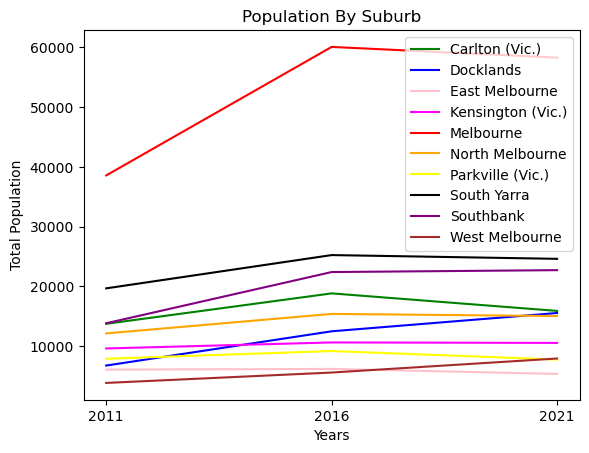

In [63]:
# Years for the x axis
years = [2011, 2016, 2021]

# Plot lines for suburbs by poulation
plt.plot(years,suburb1_total_population, color="green", label=suburb1)
plt.plot(years,suburb2_total_population, color="blue", label=suburb2)
plt.plot(years,suburb3_total_population, color="pink", label=suburb3)
plt.plot(years,suburb4_total_population, color="magenta", label=suburb4)
plt.plot(years,suburb5_total_population, color="red", label=suburb5)
plt.plot(years,suburb6_total_population, color="orange", label=suburb6)
plt.plot(years,suburb7_total_population, color="yellow", label=suburb7)
plt.plot(years,suburb8_total_population, color="black", label=suburb8)
plt.plot(years,suburb9_total_population, color="purple", label=suburb9)
plt.plot(years,suburb10_total_population, color="Brown", label=suburb10)
# Plot legend in the best place as determined by matplotlib
plt.legend(loc="best")
plt.title("Population By Suburb")
plt.xlabel("Years")
plt.xticks(np.arange(min(years), max(years)+1,5.0))
plt.ylabel("Total Population")
plt.show()

In [43]:
suburb10_total_population

Total_Population_2011    3851
Total_Population_2016    5588
Total_Population_2021    7934
Name: West Melbourne, dtype: int64

In [79]:
# Take a copy of the merged dataframe for population and median hours price only use
population_copy_for_pricing_df = population_only_df.copy()
# Reference: https://www.w3schools.com/python/pandas/ref_df_copy.asp

In [80]:
population_copy_for_pricing_df

,Total_Population_2011,Total_Population_2016,Total_Population_2021
Suburb_Name,,,
Carlton (Vic.),13742,18829,15896
Docklands,6756,12486,15547
East Melbourne,6073,6196,5358
Kensington (Vic.),9616,10621,10545
Melbourne,38560,60057,58262
North Melbourne,12134,15395,15040
Parkville (Vic.),7895,9188,7756
South Yarra,19670,25237,24609
Southbank,13832,22397,22717


In [67]:
#population_pricing_rename_df= population_copy_for_pricing_df.rename(columns={"Carlton (Vic.)":"Carlton", "Kensingon (Vic.)":"Kensington",
                                                                     "Parkville (Vic.)": "Parkville", "Melbourne":"Melbourne (CBD)",
                                                                     "West Melbourne":"West Melbourne (Residential"})

In [81]:
population_copy_for_pricing_df

,Total_Population_2011,Total_Population_2016,Total_Population_2021
Suburb_Name,,,
Carlton (Vic.),13742,18829,15896
Docklands,6756,12486,15547
East Melbourne,6073,6196,5358
Kensington (Vic.),9616,10621,10545
Melbourne,38560,60057,58262
North Melbourne,12134,15395,15040
Parkville (Vic.),7895,9188,7756
South Yarra,19670,25237,24609
Southbank,13832,22397,22717


In [ ]:
# Code from teamwork by Violet Bui for gathering median data prices for City of Melbourne small areas
# base URL for API
#base_url = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/house-prices-by-small-area-sale-year/records?limit=50&refine=sale_year%3A"

In [ ]:
# get all years
#min_year = 2000 - 1
#max_year = 2016
#temp = []

#for i in range(max_year, min_year, -1):
   # response = requests.get(base_url + str(i)).json()

  #  year_results = response["results"]

  #  for j in range(len(year_results)):
  #      temp.append(year_results[j])
    
#house_price_df = pd.DataFrame(temp)
#house_price_df.head()

In [137]:
# NOTE: Code in 2 cells above from project code written by Violet Bui provided the median residential prices, shown below at price_res_apt, and price_hse_townhse for City of Melbourne small areas
# Add 2016 Median Residential Apartment Price to the DataFrame:
price_res_apt = [508000,591000,650000,430000,435000,515000,500000,555000,565000,475000]
price_hse_townhse = [1110000, 0, 1940000, 818750, 0, 861000, 1761250,2135000,0,900000]
population_copy_for_pricing_df["2016_Median_Residential_Apt_Price"] = price_res_apt
population_copy_for_pricing_df["2016_Median_House_Townhouse_Price"] = price_hse_townhse

population_copy_for_pricing_df

,Total_Population_2011,Total_Population_2016,Total_Population_2021,2016_Median_Residential_Apt_Price,2016_Median_House_Townhouse_Price
Suburb_Name,,,,,
Carlton (Vic.),13742,18829,15896,508000,1110000
Docklands,6756,12486,15547,591000,0
East Melbourne,6073,6196,5358,650000,1940000
Kensington (Vic.),9616,10621,10545,430000,818750
Melbourne,38560,60057,58262,435000,0
North Melbourne,12134,15395,15040,515000,861000
Parkville (Vic.),7895,9188,7756,500000,1761250
South Yarra,19670,25237,24609,555000,2135000
Southbank,13832,22397,22717,565000,0


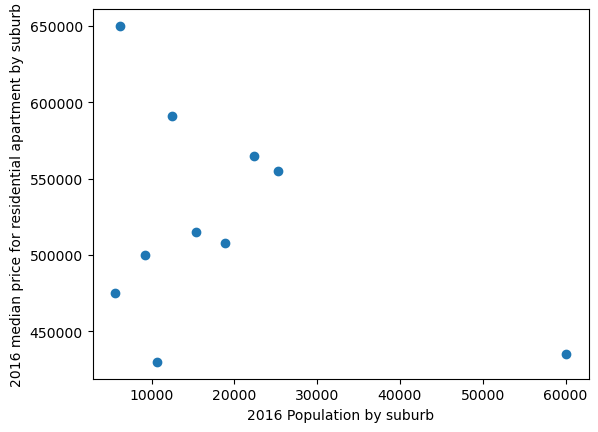

In [138]:
# Scatter plot for population and median price for residential apartment
plt.scatter(population_copy_for_pricing_df.iloc[:,1],population_copy_for_pricing_df.iloc[:,3])
plt.xlabel('2016 Population by suburb')
plt.ylabel('2016 median price for residential apartment by suburb')
plt.show()

The correlation between both factors is -0.37


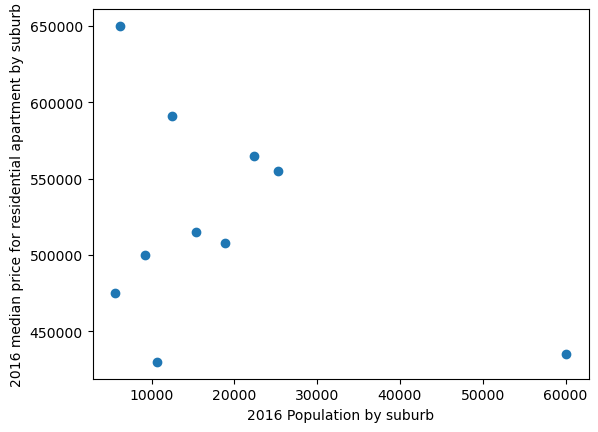

In [172]:
# Scatter plot for population and median price for residential apartment with correlation calculation
population = population_copy_for_pricing_df.iloc[:,1]
median_res_apt_price= population_copy_for_pricing_df.iloc[:,3]
correlation = st.pearsonr(population,median_res_apt_price)
plt.scatter(population,median_res_apt_price)
plt.xlabel('2016 Population by suburb')
plt.ylabel('2016 median price for residential apartment by suburb')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [163]:
# Copy dataframe, rename columns and remove rows for suburbs with no houses or townhouses.
population_copy_for_house_pricing_df = population_copy_for_pricing_df.copy()
population_copy_for_house_pricing_df = population_copy_for_house_pricing_df.rename(columns={"2016_Median_House_Townhouse_Price":"Median_House_Townhouse_Price"})
population_copy_for_house_pricing_df = population_copy_for_house_pricing_df[population_copy_for_house_pricing_df.Median_House_Townhouse_Price !=0]
population_copy_for_house_pricing_df

population_copy_for_house_pricing_df = population_copy_for_house_pricing_df.rename(columns={"Median_House_Townhouse_Price":"2016_Median_House_Townhouse_Price"})
population_copy_for_house_pricing_df

# Reference:https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

,Total_Population_2011,Total_Population_2016,Total_Population_2021,2016_Median_Residential_Apt_Price,2016_Median_House_Townhouse_Price
Suburb_Name,,,,,
Carlton (Vic.),13742,18829,15896,508000,1110000
East Melbourne,6073,6196,5358,650000,1940000
Kensington (Vic.),9616,10621,10545,430000,818750
North Melbourne,12134,15395,15040,515000,861000
Parkville (Vic.),7895,9188,7756,500000,1761250
South Yarra,19670,25237,24609,555000,2135000
West Melbourne,3851,5588,7934,475000,900000


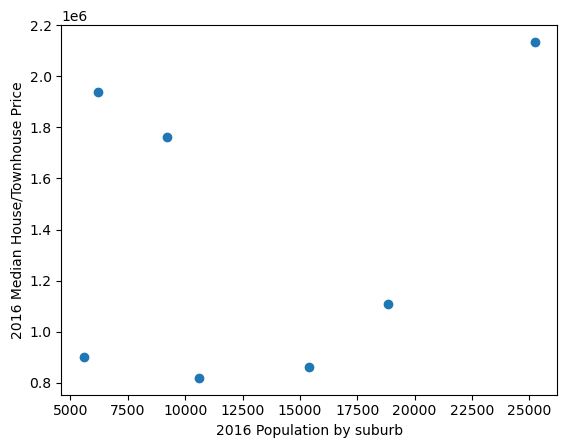

In [170]:
# Scatter plot for population and median price for house/townhouse
plt.scatter(population_copy_for_house_pricing_df.iloc[:,1],population_copy_for_house_pricing_df.iloc[:,4])
plt.xlabel('2016 Population by suburb')
plt.ylabel('2016 Median House/Townhouse Price')
plt.show()

The correlation between both factors is 0.25


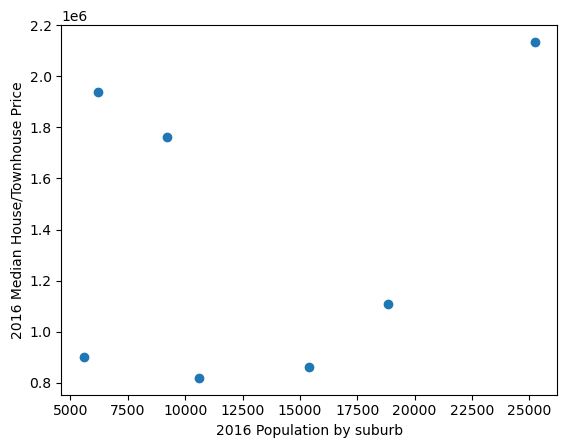

In [173]:
# Scatter plot for population and median price for house/townhouse with correlation calculation
population = population_copy_for_house_pricing_df.iloc[:,1]
median_hse_town_price= population_copy_for_house_pricing_df.iloc[:,4]
correlation = st.pearsonr(population,median_hse_town_price)
plt.scatter(population,median_hse_town_price)
plt.xlabel('2016 Population by suburb')
plt.ylabel('2016 Median House/Townhouse Price')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()